# 3_Libreria WFDB: Transformada y Antitransformada

En este ejemplo vamos a transformar y antitransforamar una señal, para determinar si existe algun tipo de diferencia entre la señal obtenida y la origianl

Primero se realiza la apertura y la grafica de la señal original

(-0.5, 5000)

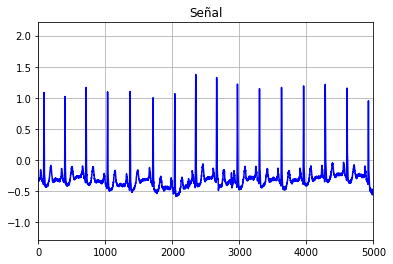

In [12]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np

n = 40980
t = np.arange( 0, n, 1 )                           

signal, fields = wfdb.io.rdsamp('101', pb_dir='mitdb',   sampto = n)

plt.figure(1)
plt.plot( t, signal[:,0] , 'b'  )
plt.title( 'Señal' )
plt.grid( True )
plt.xlim( -0.5, 5000 )

En este bloque se realiza la transformada como se explico en el ejemplo anterior

In [7]:
resf = fields.get( 'fs' )/n
rangof = np.arange( 0, 360 , resf) 
Y = np.fft.fft( signal[:,0] )

Para obtener la antitransformada se utiliza la función ifft de la librería numpy. Al aplicar esta transformada la secuencia es compleja, esto se debe a las pequeños aproximaciones que se cometen en lo algoritmos de calculo de la FFT y de la IFFT, por lo tanto para poder graficar y comparar con la secuencia original se utiliza solamente la parte real

(-0.5, 5000)

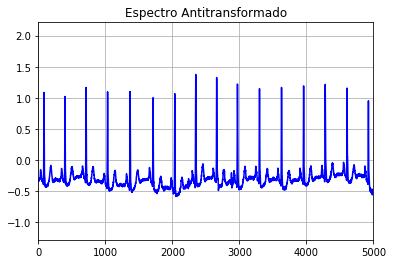

In [13]:
signalY = np.fft.ifft( Y )
signalY = signalY.real

plt.figure(1)
plt.plot( t, signalY , 'b'  )
plt.title( 'Espectro Antitransformado' )
plt.grid( True )
plt.xlim( -0.5, 5000 )

Mediante las dos gráficas es imposible notar diferencias por lo tanto se procede a generar una señal de error entre ambas y se plotea, como se muestra a continuación

(-0.5, 5000)

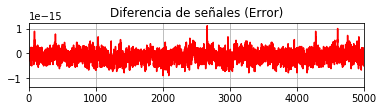

In [15]:
signalerr  =  np.zeros( n, float )
signalerr = signal[:,0] - signalY

plt.figure(1)
plt.subplot( 313 )
plt.plot( t, signalerr , 'r'  )
plt.title( 'Diferencia de señales (Error)' )
plt.grid( True )
plt.xlim( -0.5, 5000 )

La magnitud de la señal de error resultante es varios ordenes menor a la de las señales analizadas, por lo que este error generado es despreciable. Sobre esta señal se pueden realizar distintos analisis, como el de obtener su espectro en frecuencia

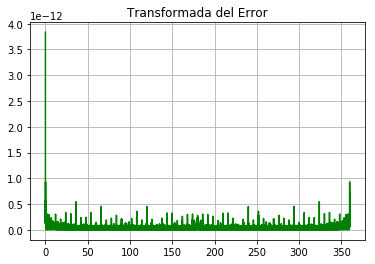

In [14]:
Yerr = np.fft.fft( signalerr )
Yerr = abs( Yerr )
plt.figure(3)
plt.plot( rangof, Yerr , 'g'  )
plt.title( 'Transformada del Error' )
plt.grid( True )

Se puede notar como la señal existe en todo el rango de frecuencias, pero principalmente para las bajas. Además exsite una cierta periocicidad entre los picos.
Otra forma de analizar esta señal de error es calcular su histograma para ver como es su distribución. Este calculo se puede realizar mediante la función hist disponible en la librería matplotlib, se debe especificar los bins y si se desea realizar un gráfico normalizado o no

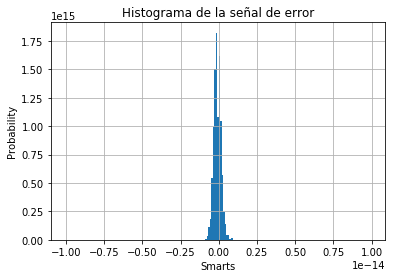

In [19]:
plt.figure(4)
n, bins, patches = plt.hist(signalerr, bins = np.arange( -10e-15, 10e-15, 0.1e-15), density=True )
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histograma de la señal de error')
plt.grid(True)
plt.show()

Este error que se presenta y se considera despreciable se debe a los errores de aproximacion que se cometen cuando se realizan operacion trigonometricas y cuando se truncan los resultados